# Determining correlation between COVID cases, deaths and twitter sentiment

In [6]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [7]:
covid = pd.read_csv("normalised_covid_deaths_cases.csv")
covid.sort_values(by='date',inplace=True)


Below we plot a simple line chart of normalized nationwide new covid cases and deaths over time, the seaborn library aggregates the values of he different states for us

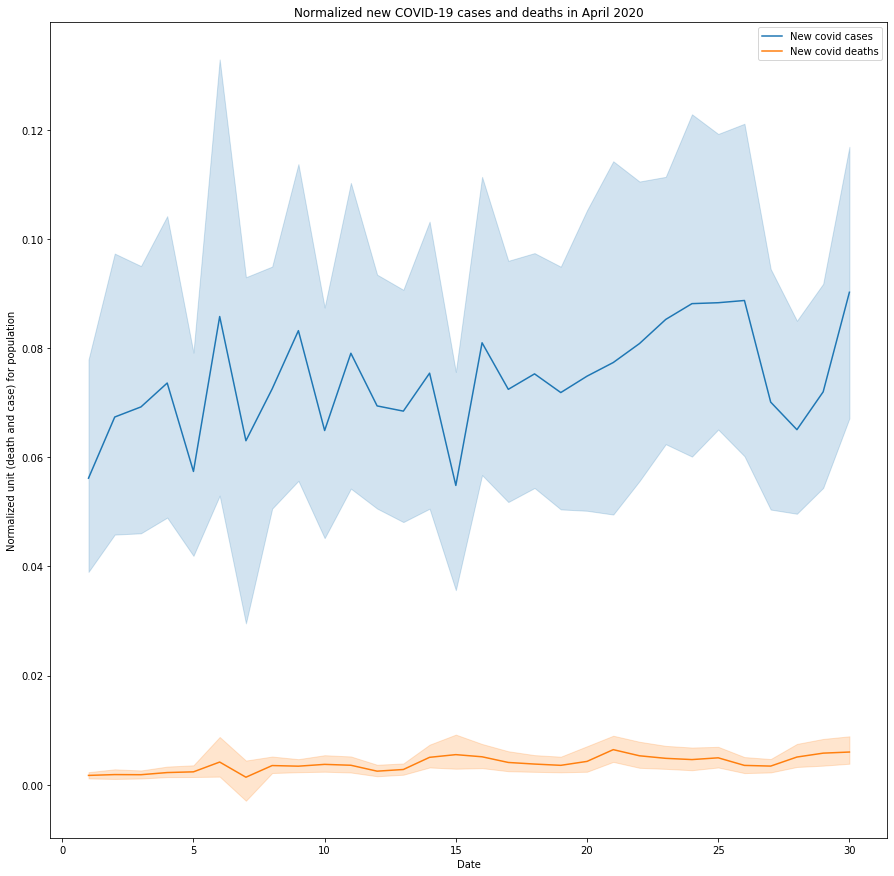

In [60]:
plt.figure(figsize=(15,15))

sns.lineplot(x=covid['short_date'],y=covid['normalized_new_case'])
sns.lineplot(x=covid['short_date'],y=covid['normalized_new_death'])
plt.xlabel('Date')
plt.ylabel('Normalized unit (death and case) for population')
plt.title('Normalized new COVID-19 cases and deaths in April 2020')
plt.legend(['New covid cases','New covid deaths'])

Now to look at sentiment we need to concatenate the average twitter sentiment csvs for each day in april, so we have one dataframe for the whole month

In [9]:
paths_list=[] #the list of paths to each daily sentiment csv
for i in range(1,31): # day 1 to 30 for the month of April
    if i>9:
        paths_list.append('../nlp/average_sentiment_{}.csv'.format(i))
    else:
        paths_list.append('../nlp/average_sentiment_0{}.csv'.format(i))

print(paths_list)

['../nlp/average_sentiment_01.csv', '../nlp/average_sentiment_02.csv', '../nlp/average_sentiment_03.csv', '../nlp/average_sentiment_04.csv', '../nlp/average_sentiment_05.csv', '../nlp/average_sentiment_06.csv', '../nlp/average_sentiment_07.csv', '../nlp/average_sentiment_08.csv', '../nlp/average_sentiment_09.csv', '../nlp/average_sentiment_10.csv', '../nlp/average_sentiment_11.csv', '../nlp/average_sentiment_12.csv', '../nlp/average_sentiment_13.csv', '../nlp/average_sentiment_14.csv', '../nlp/average_sentiment_15.csv', '../nlp/average_sentiment_16.csv', '../nlp/average_sentiment_17.csv', '../nlp/average_sentiment_18.csv', '../nlp/average_sentiment_19.csv', '../nlp/average_sentiment_20.csv', '../nlp/average_sentiment_21.csv', '../nlp/average_sentiment_22.csv', '../nlp/average_sentiment_23.csv', '../nlp/average_sentiment_24.csv', '../nlp/average_sentiment_25.csv', '../nlp/average_sentiment_26.csv', '../nlp/average_sentiment_27.csv', '../nlp/average_sentiment_28.csv', '../nlp/average_sen

In [10]:
nationwide_sentiment = []
april_average_sentiment = pd.DataFrame()
for path in paths_list:
    df = pd.read_csv(path)
    nationwide_sentiment.append(df['sentiment'].mean()) #adding the daily value to the monthly dataframe

print(nationwide_sentiment)

[-0.1667896659974472, -0.15996205105366837, -0.14739869497678584, -0.15435843701052002, -0.15753315160621292, -0.15694291420494952, -0.1476013521146406, -0.14517005178226886, -0.14759146730558015, -0.1353241571743883, -0.14880999810428322, -0.15153064919622597, -0.15278686994229906, -0.15336251486976585, -0.16859515389619315, -0.15674130723239307, -0.1616913730132844, -0.15641659147789957, -0.16736120722343734, -0.16673093970686628, -0.1583259332956597, -0.168324615611352, -0.16673093970686628, -0.15190989746069203, -0.16338323829537504, -0.17429567667995244, -0.15588063033553098, -0.17214550096865847, -0.1731214484713908, -0.15526127890942865]


Below we plot the change in covid twitter sentiment over time in the US

In [63]:
#making the font bigger
import matplotlib

font = {'size'   : 22}

matplotlib.rc('font', **font)


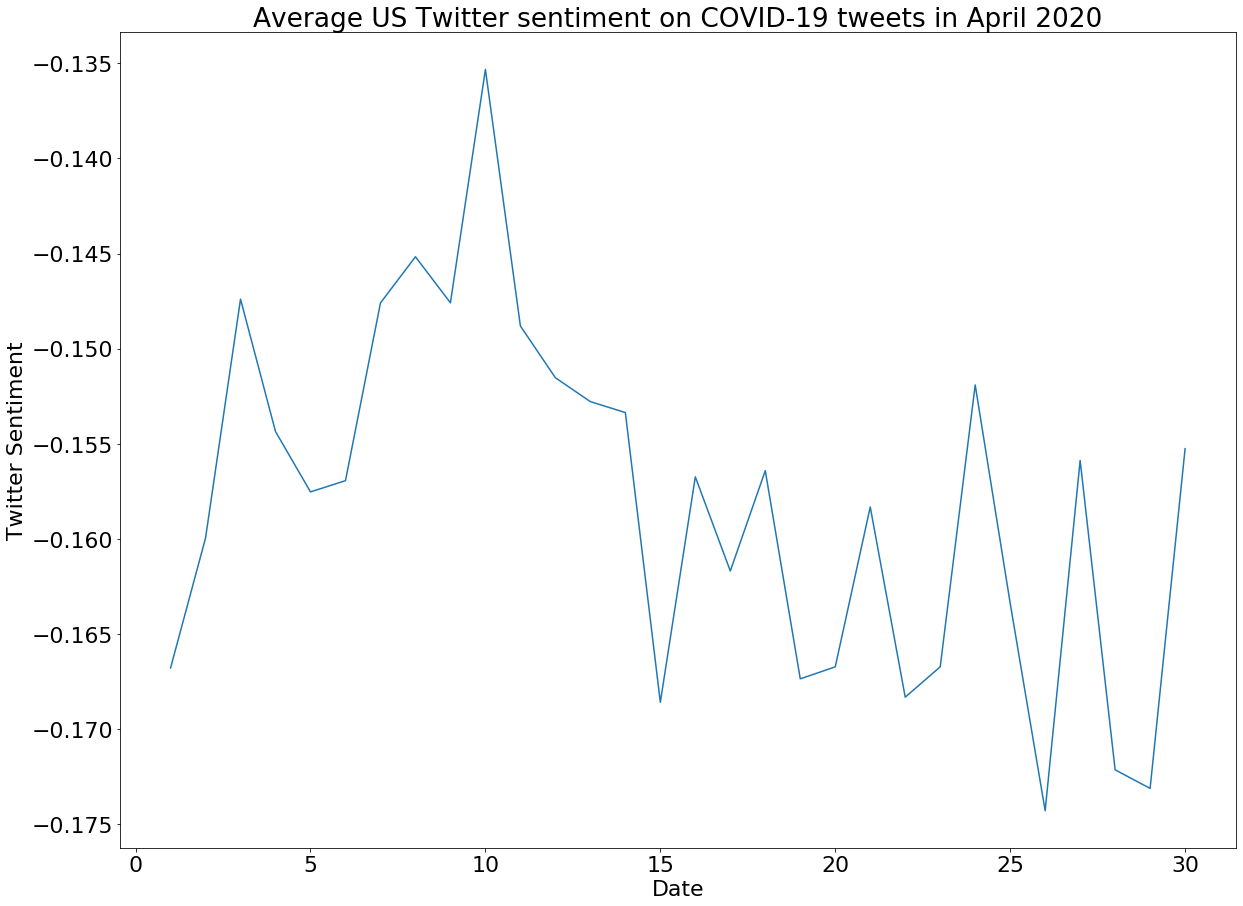

In [91]:
plt.figure(figsize=(20,15))

sns.lineplot(x=[i for i in range(1,31)],y=nationwide_sentiment)
plt.xlabel('Date')
plt.ylabel('Twitter Sentiment')
plt.title('Average US Twitter sentiment on COVID-19 tweets in April 2020')

#plt.savefig('covid_sentiment_over_time')

_______________________________________________________________

## Calculating correlation coefficients

In [92]:
# aggregate the sum of daily new deaths and cases for all states in the us
nationwide_daily_new_cases = covid.groupby(['short_date'])['normalized_new_case'].sum()
nationwide_daily_new_deaths = covid.groupby(['short_date'])['normalized_new_death'].sum()

Code was based off parts of this link: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

In [93]:
# calculate Pearson's correlation
corr, pval = pearsonr(nationwide_daily_new_cases, nationwide_sentiment)
print('Pearsons correlation between normalized new covid cases and average twitter sentiment nationwide:{}, p-value: {}'.format(corr,pval))

Pearsons correlation between normalized new covid cases and average twitter sentiment nationwide:-0.03863299470594588, p-value: 0.8393806594313514


In [94]:
corr, pval = pearsonr(nationwide_daily_new_deaths, nationwide_sentiment)
print('Pearsons correlation between normalized new covid deaths and average twitter sentiment nationwide:{}, p-value: {}'.format(corr,pval))

Pearsons correlation between normalized new covid deaths and average twitter sentiment nationwide:-0.3603282196533377, p-value: 0.05046402048859216


Negative correlation means that an increase in cases is correlated to a decrease in sentiment (thus more negative)
Deaths seem to be more highly correlated

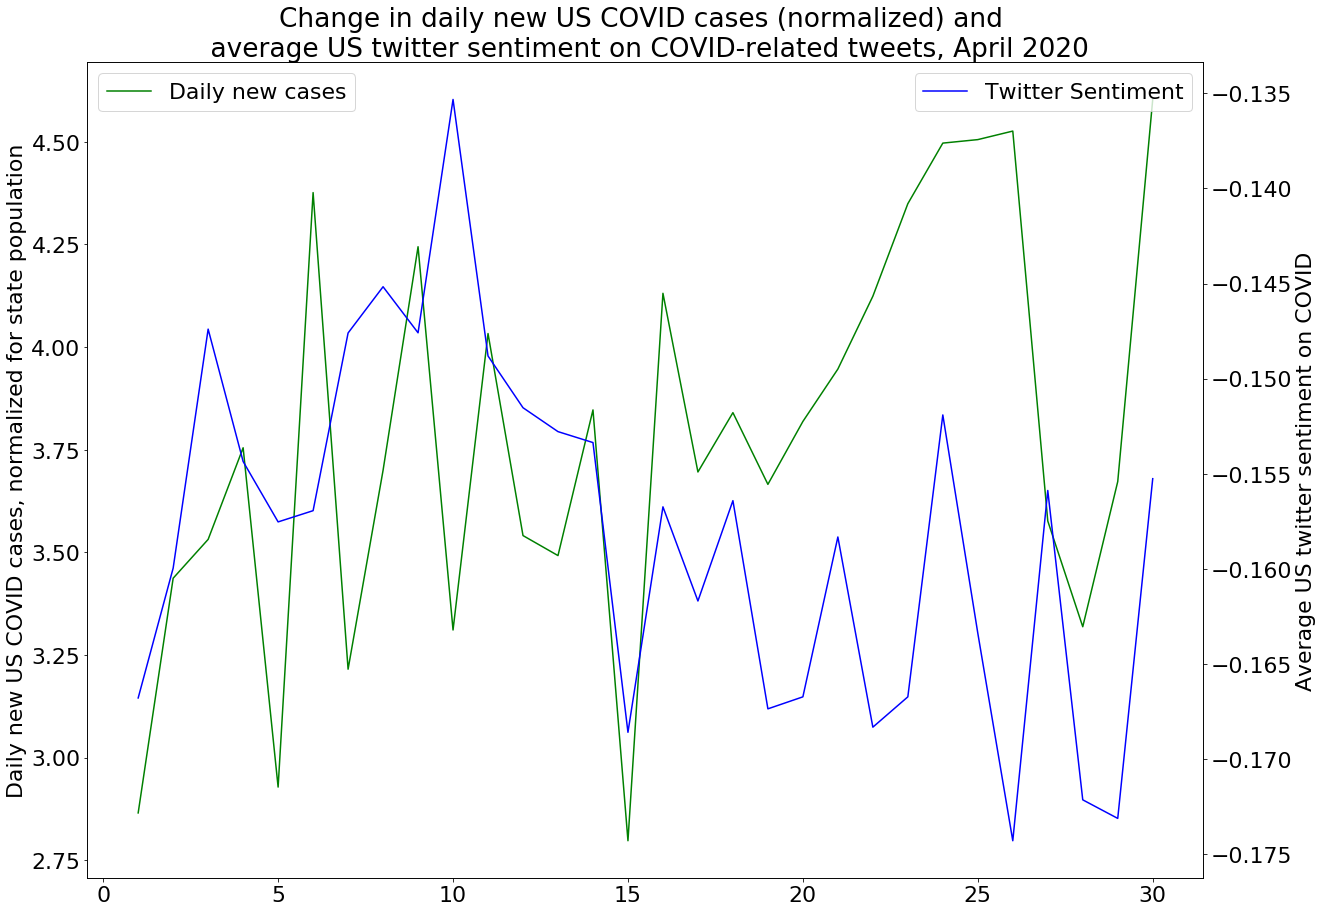

In [99]:
#https://stackoverflow.com/questions/47591650/second-y-axis-time-series-seaborn

# plotting new cases
plt.figure(figsize=(20,15))
sns.lineplot(data= nationwide_daily_new_cases, color="g")
plt.ylabel('Daily new US COVID cases, normalized for state population')
plt.legend(['Daily new cases'])

# add another y axis on the right
ax2 = plt.twinx()
sns.lineplot(y= nationwide_sentiment, x = [i for i in range(1,31)], color="b", ax=ax2)
plt.ylabel('Average US twitter sentiment on COVID')
plt.xlabel("Date in April 2020")
plt.legend(['Twitter Sentiment'])

#add title
plt.title('Change in daily new US COVID cases (normalized) and \n average US twitter sentiment on COVID-related tweets, April 2020')

#plt.savefig('nationwide_new_cases_and_sentiment_over_time')

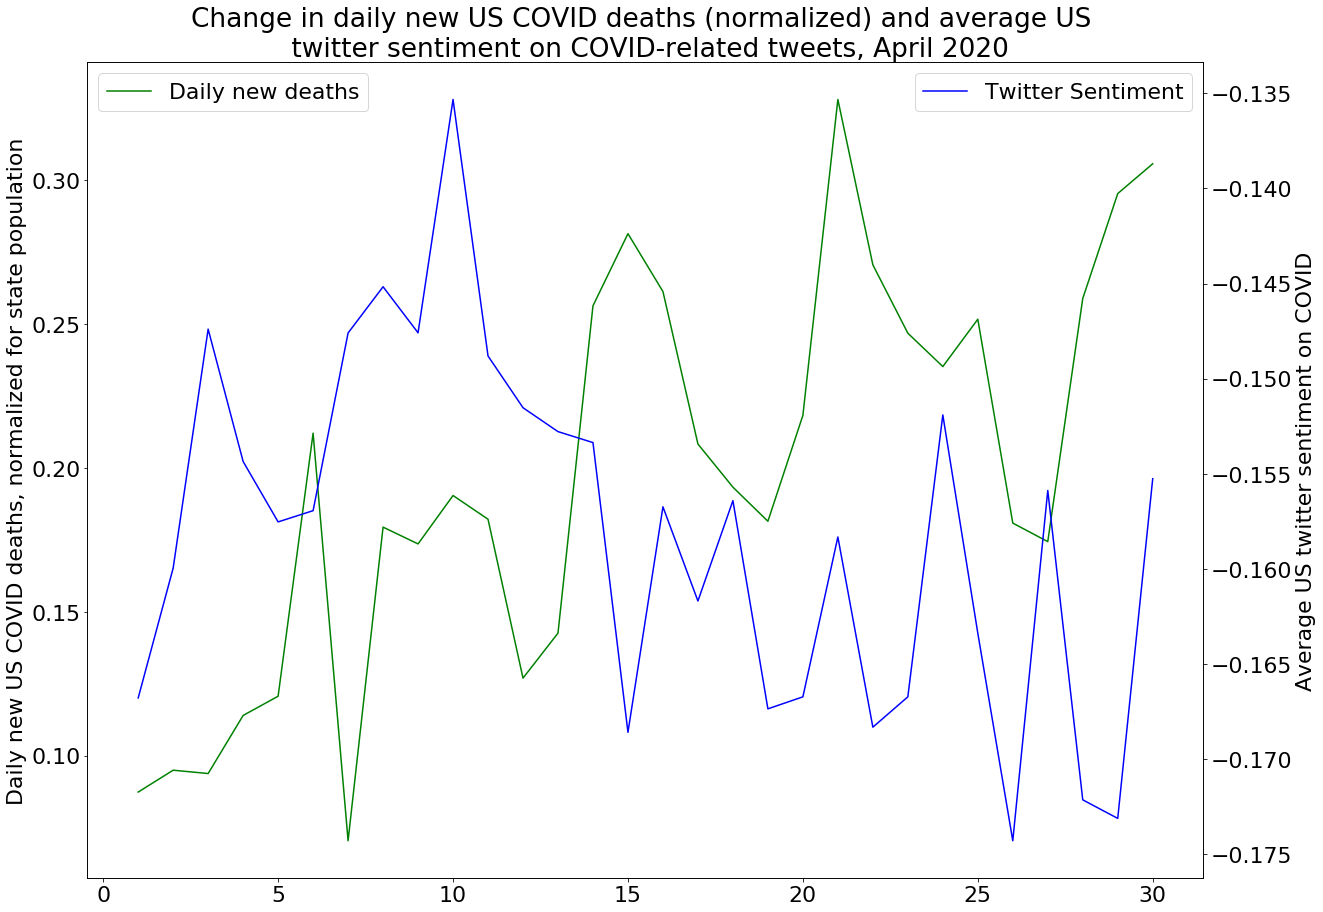

In [98]:
# plotting new deaths
plt.figure(figsize=(20,15))
sns.lineplot(data= nationwide_daily_new_deaths, color="g")
plt.ylabel('Daily new US COVID deaths, normalized for state population')
plt.legend(['Daily new deaths'], loc='upper left')

# add another y axis on the right
ax2 = plt.twinx()
sns.lineplot(y= nationwide_sentiment, x = [i for i in range(1,31)], color="b", ax=ax2)
plt.ylabel('Average US twitter sentiment on COVID')
plt.xlabel("Date in April 2020")
plt.legend(['Twitter Sentiment'])

#add title
plt.title('Change in daily new US COVID deaths (normalized) and average US \n twitter sentiment on COVID-related tweets, April 2020')

#plt.savefig('nationwide_new_deaths_and_sentiment_over_time')

Below we load the average sentiments on twitter for each day and turn it into a dataframe for the whole month

In [82]:
april_average_sentiment = pd.read_csv(paths_list[0])
april_average_sentiment['date'] = 1

for i in range(1,30):
    df = pd.read_csv(paths_list[i])
    df['date'] = i
    april_average_sentiment = april_average_sentiment.append(df, ignore_index=True)

april_average_sentiment.drop(columns='Unnamed: 0', inplace=True)

april_average_sentiment.info()
april_average_sentiment

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
sentiment    1500 non-null float64
magnitude    1500 non-null float64
state        1500 non-null object
date         1500 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 47.0+ KB


,sentiment,magnitude,state,date
0,-0.164179,0.700000,AK,1
1,-0.155914,0.640246,AL,1
2,-0.179669,0.676359,AR,1
3,-0.170283,0.675881,AZ,1
4,-0.167857,0.680188,CA,1
...,...,...,...,...
1495,-0.142558,0.710310,VA,29
1496,-0.182609,0.866667,VT,29
1497,-0.105985,0.663175,WA,29
1498,-0.155979,0.735009,WI,29


In [83]:
#april_average_sentiment.to_csv("april_average_sentiment.csv", index= False)

_________________________________________________________________________


## Plotting deaths and sentiment, with correlation coefficients for particular states

#### Wyoming

In [24]:
wyoming_daily_new_cases = covid[covid['State']=='Wyoming'][['normalized_new_case','short_date']]
wyoming_daily_new_deaths = covid[covid['State']=='Wyoming'][['normalized_new_death','short_date']]
wyoming_daily_sentiment = april_average_sentiment[april_average_sentiment['state']=='WY']

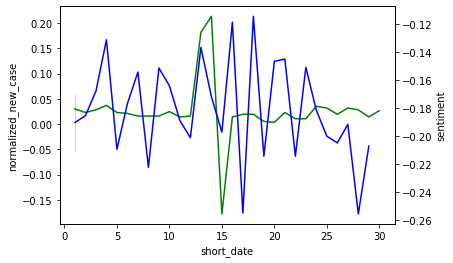

In [25]:
sns.lineplot(y=wyoming_daily_new_cases['normalized_new_case'], x=wyoming_daily_new_cases['short_date'] , color="g")
ax2 = plt.twinx()
sns.lineplot(y= wyoming_daily_sentiment['sentiment'], x = wyoming_daily_sentiment['date'], color="b", ax=ax2)

In [26]:
corr, _ = pearsonr(wyoming_daily_sentiment['sentiment'], wyoming_daily_new_cases['normalized_new_case'])
print('Pearsons correlation between normalized new covid cases and average twitter sentiment in WY: %.3f' % corr)

Pearsons correlation between normalized new covid cases and average twitter sentiment in WY: 0.061


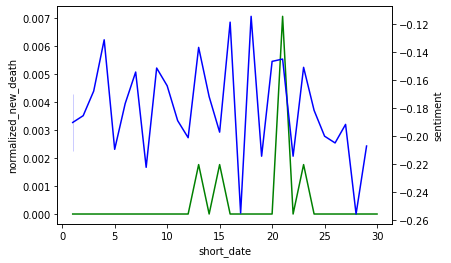

In [27]:
sns.lineplot(y=wyoming_daily_new_deaths['normalized_new_death'], x=wyoming_daily_new_deaths['short_date'] , color="g")
ax2 = plt.twinx()
sns.lineplot(y= wyoming_daily_sentiment['sentiment'], x = wyoming_daily_sentiment['date'], color="b", ax=ax2)

In [28]:
corr, _ = pearsonr(wyoming_daily_sentiment['sentiment'], wyoming_daily_new_deaths['normalized_new_death'])
print('Pearsons correlation between normalized new covid deaths and average twitter sentiment in WY: %.3f' % corr)

Pearsons correlation between normalized new covid deaths and average twitter sentiment in WY: 0.118


deaths seem to have a much higher correlation than cases

#### District of Columbia

In [29]:
dc_daily_new_cases = covid[covid['State']=='South Dakota'][['normalized_new_case','short_date']]
dc_daily_new_deaths = covid[covid['State']=='South Dakota'][['normalized_new_death','short_date']]
dc_daily_sentiment = april_average_sentiment[april_average_sentiment['state']=='DC']

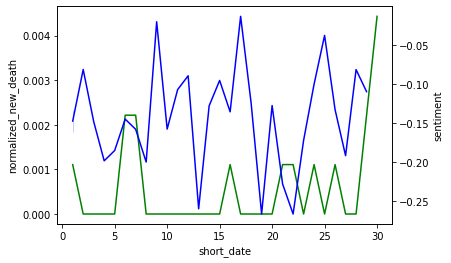

In [30]:
sns.lineplot(y=dc_daily_new_deaths['normalized_new_death'], x=dc_daily_new_deaths['short_date'] , color="g")
ax2 = plt.twinx()
sns.lineplot(y= dc_daily_sentiment['sentiment'], x = dc_daily_sentiment['date'], color="b", ax=ax2)

In [31]:
corr, _ = pearsonr(dc_daily_sentiment['sentiment'], dc_daily_new_deaths['normalized_new_death'])
print('Pearsons correlation between normalized new covid deaths and average twitter sentiment in DC: %.3f' % corr)

Pearsons correlation between normalized new covid deaths and average twitter sentiment in DC: 0.104


#### South Dakota

In [32]:
sd_daily_new_cases = covid[covid['State']=='South Dakota'][['normalized_new_case','short_date']]
sd_daily_new_deaths = covid[covid['State']=='South Dakota'][['normalized_new_death','short_date']]
sd_daily_sentiment = april_average_sentiment[april_average_sentiment['state']=='SD']

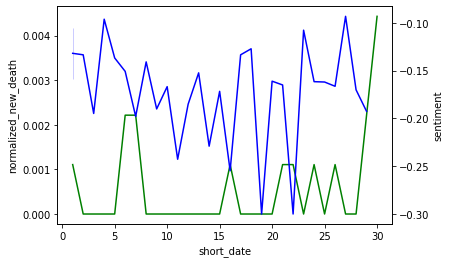

In [33]:
sns.lineplot(y=sd_daily_new_deaths['normalized_new_death'], x=sd_daily_new_deaths['short_date'] , color="g")
ax2 = plt.twinx()
sns.lineplot(y= sd_daily_sentiment['sentiment'], x = sd_daily_sentiment['date'], color="b", ax=ax2)

In [34]:
corr, _ = pearsonr(sd_daily_sentiment['sentiment'], sd_daily_new_deaths['normalized_new_death'])
print('Pearsons correlation between normalized new covid deaths and average twitter sentiment in SD: %.3f' % corr)

Pearsons correlation between normalized new covid deaths and average twitter sentiment in SD: 0.094


#### New Jersey

In [35]:
nj_daily_new_cases = covid[covid['State']=='New Jersey'][['normalized_new_case','short_date']]
nj_daily_new_deaths = covid[covid['State']=='New Jersey'][['normalized_new_death','short_date']]
nj_daily_sentiment = april_average_sentiment[april_average_sentiment['state']=='NJ']

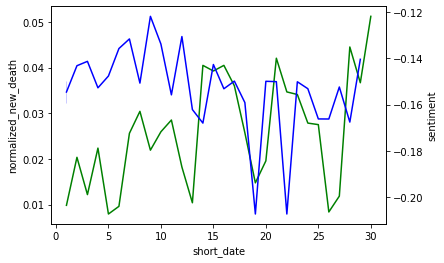

In [36]:
sns.lineplot(y=nj_daily_new_deaths['normalized_new_death'], x=nj_daily_new_deaths['short_date'] , color="g")
ax2 = plt.twinx()
sns.lineplot(y= nj_daily_sentiment['sentiment'], x = nj_daily_sentiment['date'], color="b", ax=ax2)

In [37]:
corr, _ = pearsonr(nj_daily_sentiment['sentiment'], nj_daily_new_deaths['normalized_new_death'])
print('Pearsons correlation between normalized new covid deaths and average twitter sentiment in NJ: %.3f' % corr)

Pearsons correlation between normalized new covid deaths and average twitter sentiment in NJ: -0.004


#### New York

In [38]:
ny_daily_new_cases = covid[covid['State']=='New York'][['normalized_new_case','short_date']]
ny_daily_new_deaths = covid[covid['State']=='New York'][['normalized_new_death','short_date']]
ny_daily_sentiment = april_average_sentiment[april_average_sentiment['state']=='NY']

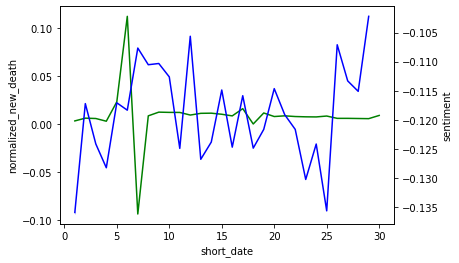

In [39]:
sns.lineplot(y=ny_daily_new_deaths['normalized_new_death'], x=ny_daily_new_deaths['short_date'] , color="g")
ax2 = plt.twinx()
sns.lineplot(y= ny_daily_sentiment['sentiment'], x = ny_daily_sentiment['date'], color="b", ax=ax2)

In [40]:
corr, _ = pearsonr(ny_daily_sentiment['sentiment'], ny_daily_new_deaths['normalized_new_death'])
print('Pearsons correlation between normalized new covid deaths and average twitter sentiment in NY: %.3f' % corr)

Pearsons correlation between normalized new covid deaths and average twitter sentiment in NY: 0.023


#### Alabama

In [41]:
al_daily_new_cases = covid[covid['State']=='Alabama'][['normalized_new_case','short_date']]
al_daily_new_deaths = covid[covid['State']=='Alabama'][['normalized_new_death','short_date']]
al_daily_sentiment = april_average_sentiment[april_average_sentiment['state']=='AL']

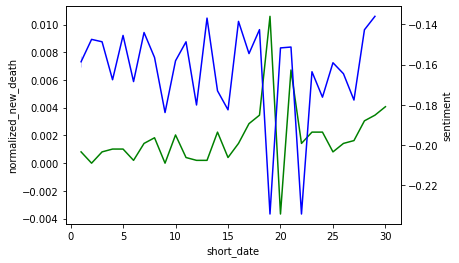

In [42]:
sns.lineplot(y=al_daily_new_deaths['normalized_new_death'], x=al_daily_new_deaths['short_date'] , color="g")
ax2 = plt.twinx()
sns.lineplot(y= al_daily_sentiment['sentiment'], x = al_daily_sentiment['date'], color="b", ax=ax2)

In [43]:
corr, _ = pearsonr(al_daily_sentiment['sentiment'], al_daily_new_deaths['normalized_new_death'])
print('Pearsons correlation between normalized new covid deaths and average twitter sentiment in AL: %.3f' % corr)

Pearsons correlation between normalized new covid deaths and average twitter sentiment in AL: 0.404


#### Mississippi

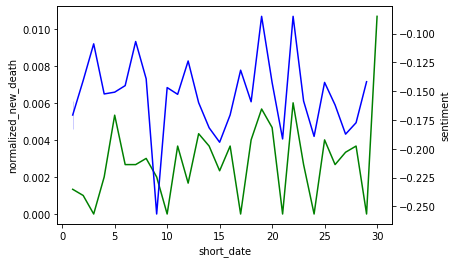

In [44]:
ms_daily_new_cases = covid[covid['State']=='Mississippi'][['normalized_new_case','short_date']]
ms_daily_new_deaths = covid[covid['State']=='Mississippi'][['normalized_new_death','short_date']]
ms_daily_sentiment = april_average_sentiment[april_average_sentiment['state']=='MS']

sns.lineplot(y=ms_daily_new_deaths['normalized_new_death'], x=ms_daily_new_deaths['short_date'] , color="g")
ax2 = plt.twinx()
sns.lineplot(y= ms_daily_sentiment['sentiment'], x = ms_daily_sentiment['date'], color="b", ax=ax2)

In [45]:
corr, _ = pearsonr(ms_daily_sentiment['sentiment'], ms_daily_new_deaths['normalized_new_death'])
print('Pearsons correlation between normalized new covid deaths and average twitter sentiment in MS: %.3f' % corr)

Pearsons correlation between normalized new covid deaths and average twitter sentiment in MS: 0.182


__________________________________________________________________________________

## Making a csv of pearson and spearman correlations for each state

In [46]:
# United States of America Python Dictionary to translate States,
# Districts & Territories to Two-Letter codes and vice versa.
#
# https://gist.github.com/rogerallen/1583593
#
# Dedicated to the public domain.  To the extent possible under law,
# Roger Allen has waived all copyright and related or neighboring
# rights to this code.

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    #'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    #'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    #'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    #'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    #'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    #'West Virginia': 'WV', ????
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
print(us_state_abbrev)

{'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'Wisconsin': 'WI', 'Wyoming': 'WY'}


In [49]:
correlations = {}
for state, abbrev in us_state_abbrev.items():
    #plt.close('all')
    daily_new_cases = covid[covid['State']==state][['normalized_new_case','short_date']]
    daily_new_deaths = covid[covid['State']==state][['normalized_new_death','short_date']]
    daily_sentiment = april_average_sentiment[april_average_sentiment['state']==abbrev]

    #sns.lineplot(y=daily_new_deaths['normalized_new_death'], x=daily_new_deaths['short_date'] , color="g")
    #ax2 = plt.twinx()
    #sns.lineplot(y= daily_sentiment['sentiment'], x = daily_sentiment['date'], color="b", ax=ax2)
    #plt.savefig("./lines/{}".format(abbrev))
    print(abbrev)
    pearson_corr, pearson_p = pearsonr(daily_sentiment['sentiment'], daily_new_deaths['normalized_new_death'])
    spearman_corr, spearman_p = spearmanr(daily_sentiment['sentiment'], daily_new_deaths['normalized_new_death'])
    correlations[abbrev] = (pearson_corr,pearson_p,spearman_corr,spearman_p)


AL
AK
AZ
AR
CA
CO
CT
DE
DC
FL
GA
HI
ID
IL
IN
IA
KS
KY
LA
ME
MD
MA
MI
MN
MS
MO
MT
NE
NV
NH
NJ
NM
NY
NC
ND
OH
OK
OR
PA
RI
SC
SD
TN
TX
UT
VT
VA
WA
WI
WY


In [50]:
for i,v in correlations.items():
    print(i,v)



AL (0.4042481242016618, 0.02671814408647127, 0.33225611785313114, 0.07283427203260615)
AK (-0.11121337488720312, 0.5584958063585365, -0.024737755063636936, 0.8967590721429773)
AZ (-0.09055759924336383, 0.6341397300193711, -0.19968901217619642, 0.29006961436227696)
AR (0.10331991662634712, 0.5869109557769993, 0.29068900663588265, 0.11914202537810153)
CA (0.0387976409514421, 0.8387050038846183, -0.005119644136237689, 0.9785793463051731)
CO (0.09252596006420559, 0.6267566987335795, 0.004566721478375133, 0.980892338044208)
CT (-0.29468397710852257, 0.11392367524904402, -0.1464174454828661, 0.4400791250855641)
DE (-0.09806096599573698, 0.6061861476164657, -0.10398667679040038, 0.5844864415618491)
DC (-0.11790701579385249, 0.5349071308955341, -0.02048392018583775, 0.914440906500294)
FL (-0.10209454313024313, 0.5913781753418044, -0.07493599871106046, 0.6939094480122878)
GA (-0.05880369183811396, 0.7575782466122387, -0.0066777966994404645, 0.9720622421997207)
HI (0.30435667162952496, 0.1019953

In [55]:
# save as dataframe
deaths_sentiment_correlations = pd.DataFrame(columns=['state','pearson_correlation', 'pearson_pvalue', 'spearman_correlation', 'spearman_pvalue'])


for key, value in correlations.items():
    deaths_sentiment_correlations = deaths_sentiment_correlations.append({'state':key,'pearson_correlation':value[0], 'pearson_pvalue':value[1],'spearman_correlation':value[2],'spearman_pvalue':value[3]}, ignore_index=True)

In [56]:
deaths_sentiment_correlations

,state,pearson_correlation,pearson_pvalue,spearman_correlation,spearman_pvalue
0,AL,0.404248,0.026718,0.332256,0.072834
1,AK,-0.111213,0.558496,-0.024738,0.896759
2,AZ,-0.090558,0.634140,-0.199689,0.290070
3,AR,0.103320,0.586911,0.290689,0.119142
4,CA,0.038798,0.838705,-0.005120,0.978579
5,CO,0.092526,0.626757,0.004567,0.980892
6,CT,-0.294684,0.113924,-0.146417,0.440079
7,DE,-0.098061,0.606186,-0.103987,0.584486
8,DC,-0.117907,0.534907,-0.020484,0.914441
9,FL,-0.102095,0.591378,-0.074936,0.693909


In [57]:
#save as csv
deaths_sentiment_correlations.to_csv('correlation_deaths_sentiment_april.csv', index=False)